In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


In [2]:
data = np.loadtxt("exampledata4.txt")

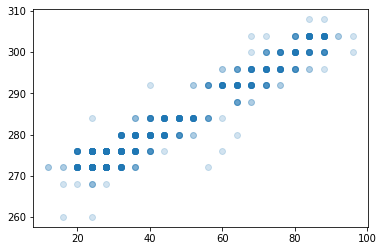

In [3]:
plt.scatter(data[:,1]*4, data[:,2]*4,alpha=0.2)

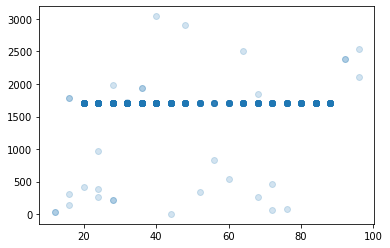

In [4]:
plt.scatter(data[:,1]*4, data[:,3],alpha=0.2)
#plt.ylim(290,310)

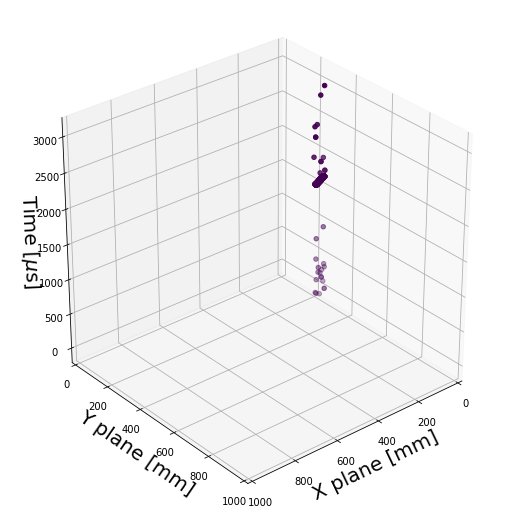

In [5]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<1]=0
size = np.ones(len(DQ))*30
size[DQ<1]=0
#ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=DQ,marker='s',c=DQ, cmap='Reds')
ax.scatter3D(data[:,1]*4, data[:,2]*4, data[:,3],c=DQ, cmap='viridis')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
#ax.set_zlim(0,1000)
#ax.set_zlim(0,600)
ax.view_init(None, 50)

ax.set_xlabel('X plane [mm]', fontsize=20, rotation=150)
ax.set_ylabel('Y plane [mm]', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)
plt.show()

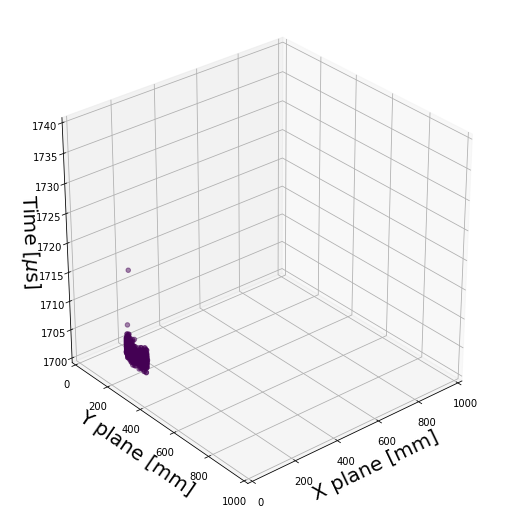

In [44]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<1]=0
size = np.ones(len(DQ))*30
size[DQ<1]=0
#ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=DQ,marker='s',c=DQ, cmap='Reds')
ax.scatter3D(data[:,1]*4, data[:,2]*4, data[:,3],c=DQ, cmap='viridis')

ax.set_xlim(1000,0)
ax.set_ylim(0,1000)
ax.set_zlim(1700,1740)
#ax.set_zlim(0,600)
ax.view_init(None, 50)

ax.set_xlabel('X plane [mm]', fontsize=20, rotation=150)
ax.set_ylabel('Y plane [mm]', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)
plt.show()

In [24]:
allpairs = []
for x in range(0,len(data[:,0])):
    xx = data[:,1][x]
    yy = data[:,2][x]
    allpairs.append([xx,yy])
allpairs = np.array(allpairs)
unipairs = np.unique(allpairs, axis=0)
print(len(unipairs))

freq = []
for p in unipairs:
    xloc = p[0]
    yloc = p[1]
    hold = 0
    for x in range(0,len(data[:,0])):
        xx = data[:,1][x]
        yy = data[:,2][x]
        if (xx == xloc) and (yy == yloc):
            hold+=1
    freq.append(hold)
freq = np.array(freq)

71


In [25]:
freq

array([ 2,  1,  1,  2,  1, 24, 12,  1,  3, 84, 45,  1,  1, 50, 45, 16, 34,
       15,  4, 20, 23,  3,  7, 25, 10,  1,  1, 18, 19,  7, 23,  2, 15,  2,
        1,  5,  6,  1,  1, 14,  2,  1,  5, 17,  5,  2, 13, 12,  1,  1,  7,
       15,  5,  1,  2, 13, 10,  7, 18,  6,  2, 11, 24,  1,  1,  8, 22,  1,
        2,  1,  1])

In [26]:
ff = np.where(freq > 2)
freq[ff]

array([24, 12,  3, 84, 45, 50, 45, 16, 34, 15,  4, 20, 23,  3,  7, 25, 10,
       18, 19,  7, 23, 15,  5,  6, 14,  5, 17,  5, 13, 12,  7, 15,  5, 13,
       10,  7, 18,  6, 11, 24,  8, 22])

In [27]:
np.where(freq == 3)

(array([ 8, 21]),)

In [28]:
np.where(freq == max(freq))

(array([9]),)

In [30]:
unipairs[9]

array([ 6., 68.])

In [33]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,1][x]
    yy = data[:,2][x]
    if (xx == 6) and (yy == 68):
        tes.append(data[:,3][x])
        tes2.append(data[:,4][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

84

In [34]:
tes

array([1705.02, 1705.38, 1705.6 , 1705.76, 1705.88, 1705.99, 1706.09,
       1706.18, 1706.26, 1706.33, 1706.4 , 1706.47, 1706.54, 1706.6 ,
       1706.66, 1706.72, 1706.77, 1706.83, 1706.89, 1706.94, 1707.  ,
       1707.06, 1707.11, 1707.17, 1707.22, 1707.28, 1707.34, 1707.39,
       1707.46, 1707.52, 1707.58, 1707.65, 1707.72, 1707.8 , 1707.88,
       1707.97, 1708.06, 1708.17, 1708.3 , 1708.47, 1708.68, 1709.09,
       1705.02, 1705.38, 1705.6 , 1705.76, 1705.88, 1705.99, 1706.09,
       1706.18, 1706.26, 1706.33, 1706.4 , 1706.47, 1706.54, 1706.6 ,
       1706.66, 1706.72, 1706.77, 1706.83, 1706.89, 1706.94, 1707.  ,
       1707.06, 1707.11, 1707.17, 1707.22, 1707.28, 1707.34, 1707.39,
       1707.46, 1707.52, 1707.58, 1707.65, 1707.72, 1707.8 , 1707.88,
       1707.97, 1708.06, 1708.17, 1708.3 , 1708.47, 1708.68, 1709.09])

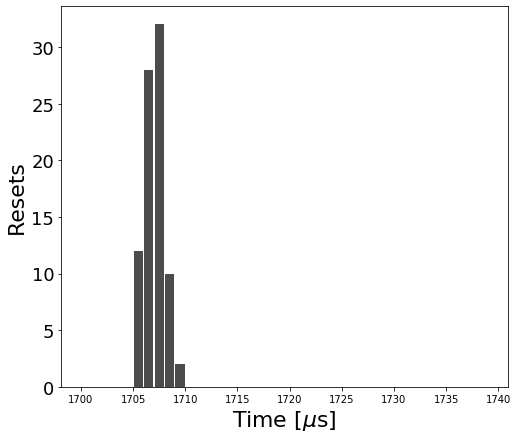

In [35]:
plt.figure(figsize=(8,7))
bins = np.arange(1700,1740,1)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)
#plt.hist(tes,rwidth=0.9,color='k',alpha=0.7)
#plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

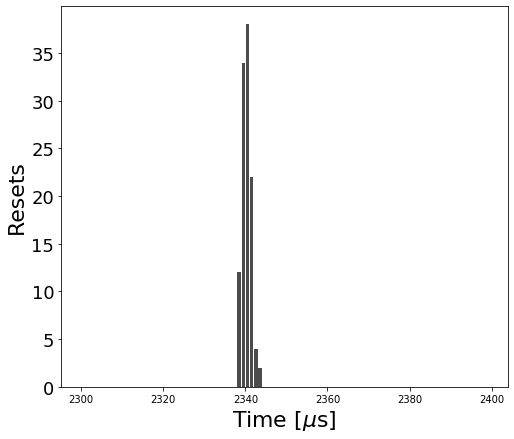

In [47]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,1)

#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

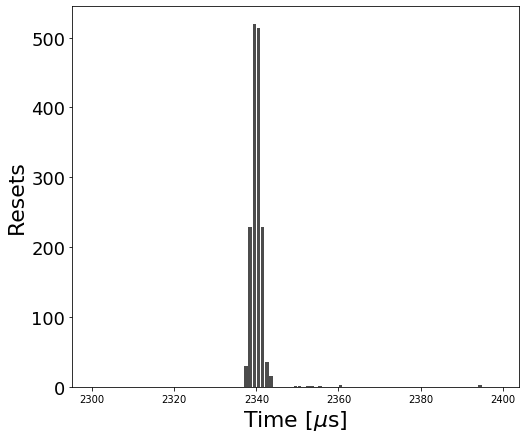

In [48]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,1)
#bins = np.arange(100,600,1)

plt.hist(data[:,2],bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

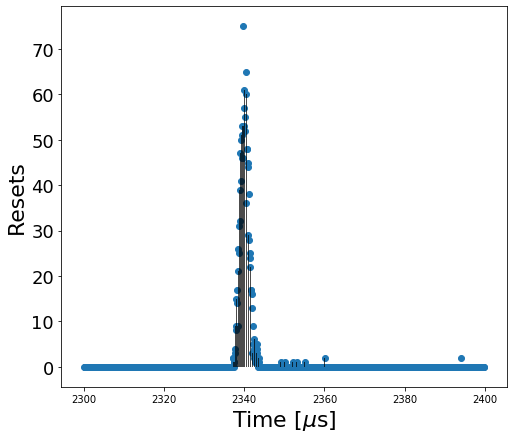

In [54]:
plt.figure(figsize=(8,7))
bins = np.arange(2300,2400,.1)
#bins = np.arange(40,60,0.5)
plt.hist(data[:,2],bins=bins,rwidth=0.9,color='k',alpha=0.7)

a,b = np.histogram(data[:,2],bins=bins)
bc = (b[1:] + b[:-1])/2
plt.scatter(bc,a)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [55]:
a,b = np.histogram(data[:,2],bins=bins)
bc = (b[1:] + b[:-1])/2

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,bc,a,p0=[1,2340,1])
print(popt)

[5.86146321e+01 2.33999275e+03 1.07386935e+00]


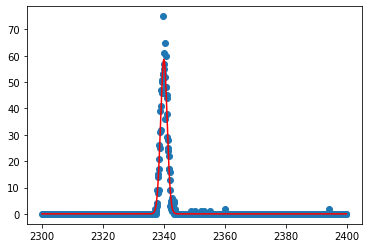

In [56]:
xval = bins#np.arange(10,90,0.1)
plt.scatter(bc,a)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [59]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

3782.802883232795

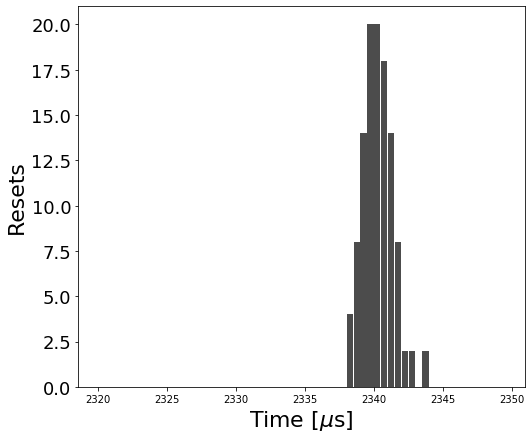

In [97]:
plt.figure(figsize=(8,7))
bins = np.arange(2320,2350,0.5)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)
#plt.hist(tes,rwidth=0.9,color='k',alpha=0.7)
#plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [98]:
a,b = np.histogram(tes,bins=bins)
bc = (b[1:] + b[:-1])/2

In [99]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,bc,a,p0=[30,2340,5])
print(popt)

[2.09810566e+01 2.34021885e+03 1.06388424e+00]


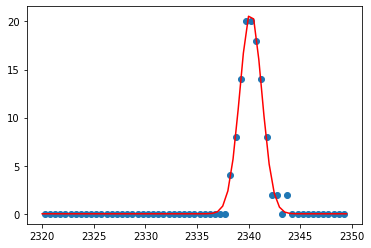

In [100]:
xval = bins#np.arange(10,90,0.1)
plt.scatter(bc,a)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [101]:
E_vel = 1.648#; //mm/mus
DiffusionL = 682.23/1e6#;  //mm**2/mus
DiffusionT = 1315.86/1e6#; //mm**2/mus

In [102]:

(popt[2]**2*E_vel**3)/(2*DiffusionL)

3712.7829491604152

In [96]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

2454.5583735789337

In [35]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    if (xx == 126) and (yy == 152):
        tes.append(data[:,2][x])
        tes2.append(1/data[:,3][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

42

(250, 350)

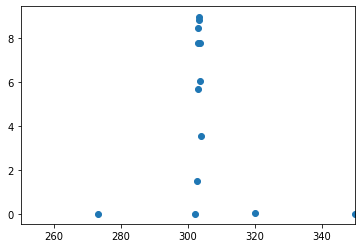

In [36]:
plt.scatter(tes,tes2)
plt.xlim(250,350)

In [37]:
popt,pcov = curve_fit(gaus,tes,tes2,p0=[1,300,1])
print(popt)

[  9.10529448 303.29195628   0.39979361]


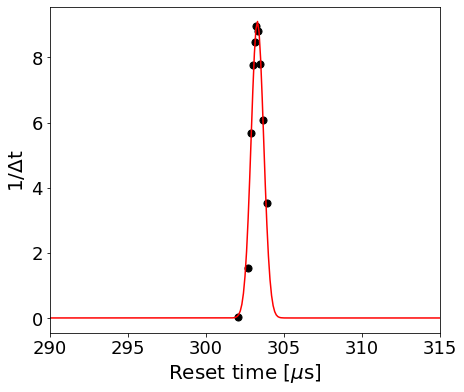

In [51]:
plt.figure(figsize=(7,6))
xval = np.arange(250,350,0.1)
plt.scatter(tes,tes2,color='k',s=50)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')

plt.xlim(290,315)
plt.xlabel(r"Reset time [$\mu$s]",fontsize=20)
plt.ylabel(r"1/$\Delta$t ",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [39]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

524.3031993154112

In [33]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

290.8639847643645

In [6]:
X=200
Y=321

In [10]:
idd = X*10000+Y

In [11]:
idd

2000321

In [13]:
idd/10000

200.0321

In [14]:
idd = Y*10000+X
idd

3210200

In [15]:
idd/10000

321.02

In [16]:
0.02*10000

200.0

In [19]:
127206/1000

127.206

In [20]:
0.206*1000

206.0